## Multiclass Classification using Deep Neural Networks

### (OCR Letter Recognition Dataset)

In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd

In [4]:
import requests
import zipfile
import os

url = 'https://archive.ics.uci.edu/static/public/59/letter+recognition.zip'
filename = 'letter+recognition.zip'

response = requests.get(url)
with open(filename, 'wb') as f:  #this is just for downloading the dataset from the url
    f.write(response.content)

with zipfile.ZipFile(filename, 'r') as zip_ref: #this extracts the zip file downloaded
    zip_ref.extractall('letter_recognition')  
    # Specify the directory to extract files to

In [5]:
extracted_folder = 'letter_recognition'
extracted_files = os.listdir(extracted_folder)
print(extracted_files) #only use the 'letter-recognition.data' dataset from the extracted folders

['Index', 'letter-recognition.data', 'letter-recognition.data.Z', 'letter-recognition.names']


In [6]:
csv_file = os.path.join(extracted_folder, 'letter-recognition.data')

In [7]:
df = pd.read_csv(csv_file, header=None)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [9]:
df[0] = df[0].apply(lambda x: ord(x) - ord('A'))
#Convert the letter labels to numerical values.

In [10]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [11]:
y = to_categorical(y, num_classes=26)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')
])

In [15]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train,
                   epochs=30,
                   batch_size=32,
                   validation_split=0.2,
                   verbose=1)

Epoch 1/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2479 - loss: 2.6422 - val_accuracy: 0.6956 - val_loss: 1.1764
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5781 - loss: 1.3511 - val_accuracy: 0.7522 - val_loss: 0.9041
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6526 - loss: 1.1055 - val_accuracy: 0.7797 - val_loss: 0.7717
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6908 - loss: 0.9856 - val_accuracy: 0.7947 - val_loss: 0.6926
Epoch 5/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7122 - loss: 0.9177 - val_accuracy: 0.8128 - val_loss: 0.6329
Epoch 6/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7358 - loss: 0.8245 - val_accuracy: 0.8300 - val_loss: 0.5844
Epoch 7/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7545 - loss: 0.7776 - val_accuracy: 0.8397 - val_loss: 0.5419
Epoch 8/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7677 - loss: 0.7390 - val_accuracy: 0.

In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Test Loss: 0.2466
Test Accuracy: 92.73%


In [18]:
predictions = model.predict(X_test)
y_pred = predictions.argmax(axis=1)
y_true = y_test.argmax(axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [19]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=[chr(i) for i in range(ord('A'), ord('Z')+1)]))

Classification Report:

              precision    recall  f1-score   support

           A       0.96      0.97      0.97       149
           B       0.88      0.90      0.89       153
           C       0.97      0.93      0.95       137
           D       0.91      0.91      0.91       156
           E       0.94      0.91      0.93       141
           F       0.89      0.91      0.90       140
           G       0.88      0.92      0.90       160
           H       0.88      0.85      0.87       144
           I       0.94      0.90      0.92       146
           J       0.96      0.93      0.94       149
           K       0.87      0.90      0.89       130
           L       0.98      0.89      0.93       155
           M       0.96      0.96      0.96       168
           N       0.97      0.93      0.95       151
           O       0.93      0.91      0.92       145
           P       0.98      0.89      0.93       173
           Q       0.99      0.95      0.97       166
   

#### (optional code below)

In [21]:
model.save("ocr_multiclass_model.keras")

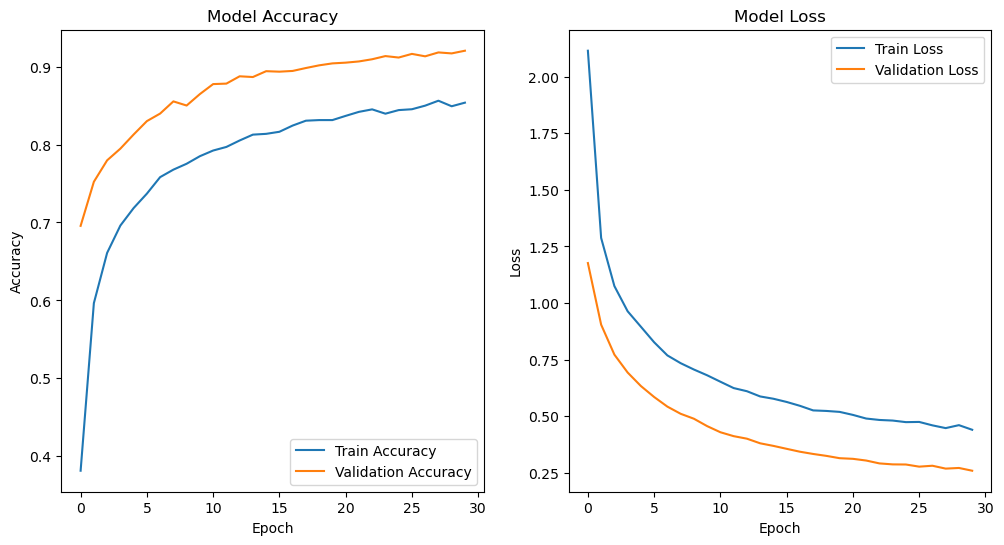

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()